[**Blueprints for Text Analysis Using Python**](https://github.com/blueprints-for-text-analytics-python/blueprints-text)  
Jens Albrecht, Sidharth Ramachandran, Christian Winkler

**If you like the book or the code examples here, please leave a friendly comment on [Amazon.com](https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X)!**
<img src="https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/rating.png?raw=1" width="100"/>

# Chapter 02:<div class='tocSkip'/>

## Remark<div class='tocSkip'/>

The code in this notebook differs slightly from the printed book. For example we frequently use pretty print (`pp.pprint`) instead of `print` and `tqdm`'s `progress_apply` instead of Pandas' `apply`.

Moreover, several layout and formatting commands, like `figsize` to control figure size or subplot commands are removed in the book.

You may also find some lines marked with three hashes ###. Those are not in the book as well as they don't contribute to the concept.

All of this is done to simplify the code in the book and put the focus on the important parts instead of formatting.

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [1]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch02/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/settings.py
!wget -P /content/packages/blueprints https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/packages/blueprints/exploration.py
!wget -P /content/ch02 https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/ch02/requirements.txt

Additional setup ...
!pip install -r ch02/requirements.txt
!python -m nltk.downloader stopwords


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [2]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# to print output of all statements and not just the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# path to import blueprints packages
sys.path.append(BASE_DIR + '/packages')

In [3]:
# adjust matplotlib resolution for book version
matplotlib.rcParams.update({'figure.dpi': 200 })

# How to use APIs to extract and derive insights from text data

# Application Programming Interface

# Blueprint - Extracting data from an API using the requests module

In [4]:
import requests

response = requests.get('https://api.github.com/repositories',
                        headers={'Accept': 'application/vnd.github.v3+json'})
print(response.status_code)

200


In [5]:
print (response.encoding)
print (response.headers['Content-Type'])
print (response.headers['server'])

utf-8
application/json; charset=utf-8
github.com


In [6]:
response.headers

{'Date': 'Thu, 12 Dec 2024 13:43:22 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"4e83084a9c0f5b8c1c69e77e2ea268281aca3e0759bc752b45c58dc9958979aa"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/repositories?since=369>; rel="next", <https://api.github.com/repositories{?since}>; rel="first"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'n

In [7]:
import json
print (json.dumps(response.json()[0], indent=2)[:200])

{
  "id": 1,
  "node_id": "MDEwOlJlcG9zaXRvcnkx",
  "name": "grit",
  "full_name": "mojombo/grit",
  "private": false,
  "owner": {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",



In [9]:
response = requests.get('https://api.github.com/search/repositories')
print(response.status_code)

422


In [10]:
response = requests.get('https://api.github.com/search/repositories',
    params={'q': 'data_science+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'})
print(response.status_code)

200


In [11]:
from IPython.display import Markdown, display  ###
def printmd(string):  ###
    display(Markdown(string))  ###

for item in response.json()['items'][:5]:
    printmd('**' + item['name'] + '**' + ': repository ' +
            item['text_matches'][0]['property'] + ' - \"*' +
            item['text_matches'][0]['fragment'] + '*\" matched with ' + '**' +
            item['text_matches'][0]['matches'][0]['text'] + '**')

**awesome**: repository description - "*Awesome resources on Bioinformatics, data science, machine learning, programming language (Python, Golang, R, Perl) and miscellaneous stuff.*" matched with **data science**

**Python**: repository description - "*this resporatory have ml,ai,nlp,data science etc.python language related material from many websites eg. datacamp,geeksforgeeks,linkedin,youtube,udemy etc. also it include programming challange/competion solutions*" matched with **data science**

**hu-dsf**: repository description - "*Introduction course to data science using the Python programming language in the form of Jupyter Notebooks*" matched with **data science**

**math-server-docker**: repository description - "*The ideal multi-user Data Science server with Jupyterhub and RStudio, ready for Python, R and Julia languages.*" matched with **Data Science**

**Data-Science-Projects**: repository description - "*Data Science projects on various problem statements and datasets using Data Analysis, Machine Learning Algorithms, Deep Learning Algorithms, Natural Language Processing, Business Intelligence concepts by Python*" matched with **Data Science**

In [12]:
response = requests.get(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('Response Code', response.status_code)
print('Number of comments', len(response.json()))

Response Code 200
Number of comments 30


In [13]:
response.links

{'next': {'url': 'https://api.github.com/repositories/65600975/issues/comments?page=2',
  'rel': 'next'},
 'last': {'url': 'https://api.github.com/repositories/65600975/issues/comments?page=1000',
  'rel': 'last'}}

In [14]:
def get_all_pages(url, params=None, headers=None):
    output_json = []
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if next_url is not None:
                output_json += get_all_pages(next_url, params, headers)
    return output_json


out = get_all_pages(
    "https://api.github.com/repos/pytorch/pytorch/issues/comments",
    params={
        'since': '2020-07-01T10:00:01Z',
        'sorted': 'created',
        'direction': 'desc'
    },
    headers={'Accept': 'application/vnd.github.v3+json'})
df = pd.DataFrame(out)

In [17]:
print(df.head())

                                                                       url  \
0  https://api.github.com/repos/pytorch/pytorch/issues/comments/2538998623   
1  https://api.github.com/repos/pytorch/pytorch/issues/comments/2538995862   
2  https://api.github.com/repos/pytorch/pytorch/issues/comments/2538992520   
3  https://api.github.com/repos/pytorch/pytorch/issues/comments/2538989800   
4  https://api.github.com/repos/pytorch/pytorch/issues/comments/2538986785   

                                                                 html_url  \
0  https://github.com/pytorch/pytorch/pull/142020#issuecomment-2538998623   
1  https://github.com/pytorch/pytorch/pull/142020#issuecomment-2538995862   
2  https://github.com/pytorch/pytorch/pull/142020#issuecomment-2538992520   
3  https://github.com/pytorch/pytorch/pull/142020#issuecomment-2538989800   
4  https://github.com/pytorch/pytorch/pull/142020#issuecomment-2538986785   

                                                    issue_url       

In [19]:
# pd.set_option('display.max_colwidth', -1) ###
pd.set_option('display.max_colwidth', None) ###
print(df['body'].count())
print(df[['id','created_at','body']].sample(1, random_state=42))

1440
             id            created_at  \
168  2537838378  2024-12-12T05:20:01Z   

                                                                                                                                body  
168  > err, sorry, what exactly is your report? The first post is from a very old convo\r\n\r\nthe second and the third post, thanks  


In [20]:
response = requests.head(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('X-Ratelimit-Limit', response.headers['X-Ratelimit-Limit'])
print('X-Ratelimit-Remaining', response.headers['X-Ratelimit-Remaining'])

# Converting UTC time to human-readable format
import datetime
print(
    'Rate Limits reset at',
    datetime.datetime.fromtimestamp(int(
        response.headers['X-RateLimit-Reset'])).strftime('%c'))

X-Ratelimit-Limit 60
X-Ratelimit-Remaining 10
Rate Limits reset at Thu Dec 12 14:45:39 2024


In [21]:
from datetime import datetime
import time

def handle_rate_limits(response):
    now = datetime.now()
    reset_time = datetime.fromtimestamp(
        int(response.headers['X-RateLimit-Reset']))
    remaining_requests = response.headers['X-Ratelimit-Remaining']
    remaining_time = (reset_time - now).total_seconds()
    intervals = remaining_time / (1.0 + int(remaining_requests))
    print('Sleeping for', intervals)
    time.sleep(intervals)
    return True

In [22]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

response = http.get('https://api.github.com/search/repositories',
                   params={'q': 'data_science+language:python'})

for item in response.json()['items'][:5]:
    print (item['name'])

awesome
Python
hu-dsf
math-server-docker
Data-Science-Projects


In [23]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

def get_all_pages(url, param=None, header=None):
    output_json = []
    response = http.get(url, params=param, headers=header)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if (next_url is not None) and (handle_rate_limits(response)):
                output_json += get_all_pages(next_url, param, header)
    return output_json

In [24]:
out = get_all_pages("https://api.github.com/repos/pytorch/pytorch/issues/comments", param={'since': '2020-04-01T00:00:01Z'})
df = pd.DataFrame(out)

In [26]:
df.head()

""


# Blueprint - Extracting Twitter data with Tweepy

In [ ]:
import tweepy

# app_api_key = 'YOUR_APP_KEY_HERE'
# app_api_secret_key = 'YOUR_APP_SECRET_HERE'

# auth = tweepy.AppAuthHandler(app_api_key, app_api_secret_key)
# api = tweepy.API(auth)

# print ('API Host', api.host)
# print ('API Version', api.api_root)

API Host api.twitter.com
API Version /1.1


In [27]:
!wget https://github.com/jyellow/blueprints-text/raw/master/ch02/Tweets_010136656960.txt
!wget https://github.com/jyellow/blueprints-text/raw/master/ch02/Tweets_104210491845.txt

--2024-12-12 13:58:27--  https://github.com/jyellow/blueprints-text/raw/master/ch02/Tweets_010136656960.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jyellow/blueprints-text/master/ch02/Tweets_010136656960.txt [following]
--2024-12-12 13:58:28--  https://raw.githubusercontent.com/jyellow/blueprints-text/master/ch02/Tweets_010136656960.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77020 (75K) [text/plain]
Saving to: ‘Tweets_010136656960.txt’

Tweets_010136656960 100%[===================>]  75.21K  --.-KB/s    in 0.002s  

2024-12-12 13:58:28 (40.0 MB/s) - ‘Tweets_010136656960.txt’ sav

In [29]:
# pd.set_option('display.max_colwidth', None) ###
# search_term = 'cryptocurrency'

# tweets = tweepy.Cursor(api.search,
#                        q=search_term,
#                        lang="en").items(100)

# retrieved_tweets = [tweet._json for tweet in tweets]
tweets_file_name = 'Tweets_104210491845.txt'
# 使用从github中拉取的本地文件来生成JSON数据
with open(tweets_file_name, 'r') as f:
    retrieved_tweets = json.load(f)
df = pd.json_normalize(retrieved_tweets)

df[['text']].sample(3)

,text
0,@Acousticmoron @Acousticmemer @htrtomoon
9,RT @flurbnb: $120 to one person in 24 hours\n\nRetweet &amp; follow @shiller_crypto\n\n#cryptocurrency #cryptocurrencies #cryptocurrencyNews #crypt…
4,"RT @AXISDeFi: AXIS DeFi — A New Era\n\nAxis has been testing several concepts, and we are beyond excited about the new direction of the proje…"


In [33]:
# 查看数据的所有字段
list(df.columns)

['created_at',
 'id',
 'id_str',
 'text',
 'source',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'quoted_status_id',
 'quoted_status_id_str',
 'is_quote_status',
 'quote_count',
 'reply_count',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'filter_level',
 'lang',
 'timestamp_ms',
 'user.id',
 'user.id_str',
 'user.name',
 'user.screen_name',
 'user.location',
 'user.url',
 'user.description',
 'user.translator_type',
 'user.protected',
 'user.verified',
 'user.followers_count',
 'user.friends_count',
 'user.listed_count',
 'user.favourites_count',
 'user.statuses_count',
 'user.created_at',
 'user.utc_offset',
 'user.time_zone',
 'user.geo_enabled',
 'user.lang',
 'user.contributors_enabled',
 'user.is_translator',
 'user.profile_background_color',
 'user.profile_background_image_url',
 'user.profile_backgroun

In [32]:
# df['full_text'].dtype

KeyError: 'full_text'

In [ ]:
# api = tweepy.API(auth,
#                  wait_on_rate_limit=True,
#                  wait_on_rate_limit_notify=True,
#                  retry_count=5,
#                  retry_delay=10)

# search_term = 'cryptocurrency OR crypto -filter:retweets'

# tweets = tweepy.Cursor(api.search,
#                        q=search_term,
#                        lang="en",
#                        tweet_mode='extended',
#                        count=30).items(12000)

# retrieved_tweets = [tweet._json for tweet in tweets]

# df = pd.json_normalize(retrieved_tweets)
# print('Number of retrieved tweets ', len(df))

Number of retrieved tweets  12000


In [36]:
print(df[['created_at','retweeted_status.extended_tweet.full_text','entities.hashtags']].sample(2))

                       created_at retweeted_status.extended_tweet.full_text  \
3  Mon May 10 08:42:03 +0000 2021                                       NaN   
6  Mon May 10 08:42:04 +0000 2021                                       NaN   

                                                                                                                                                                                                        entities.hashtags  
3                                                                                                                                                                                                                      []  
6  [{'text': 'News', 'indices': [92, 97]}, {'text': 'blockchain', 'indices': [98, 109]}, {'text': 'crypto', 'indices': [110, 117]}, {'text': 'DOGE', 'indices': [118, 123]}, {'text': 'Dogecoin', 'indices': [124, 133]}]  


In [37]:
def extract_entities(entity_list):
    entities = set()
    if len(entity_list) != 0:
        for item in entity_list:
            for key,value in item.items():
                if key == 'text':
                    entities.add(value.lower())
    return list(entities)

<Axes: >

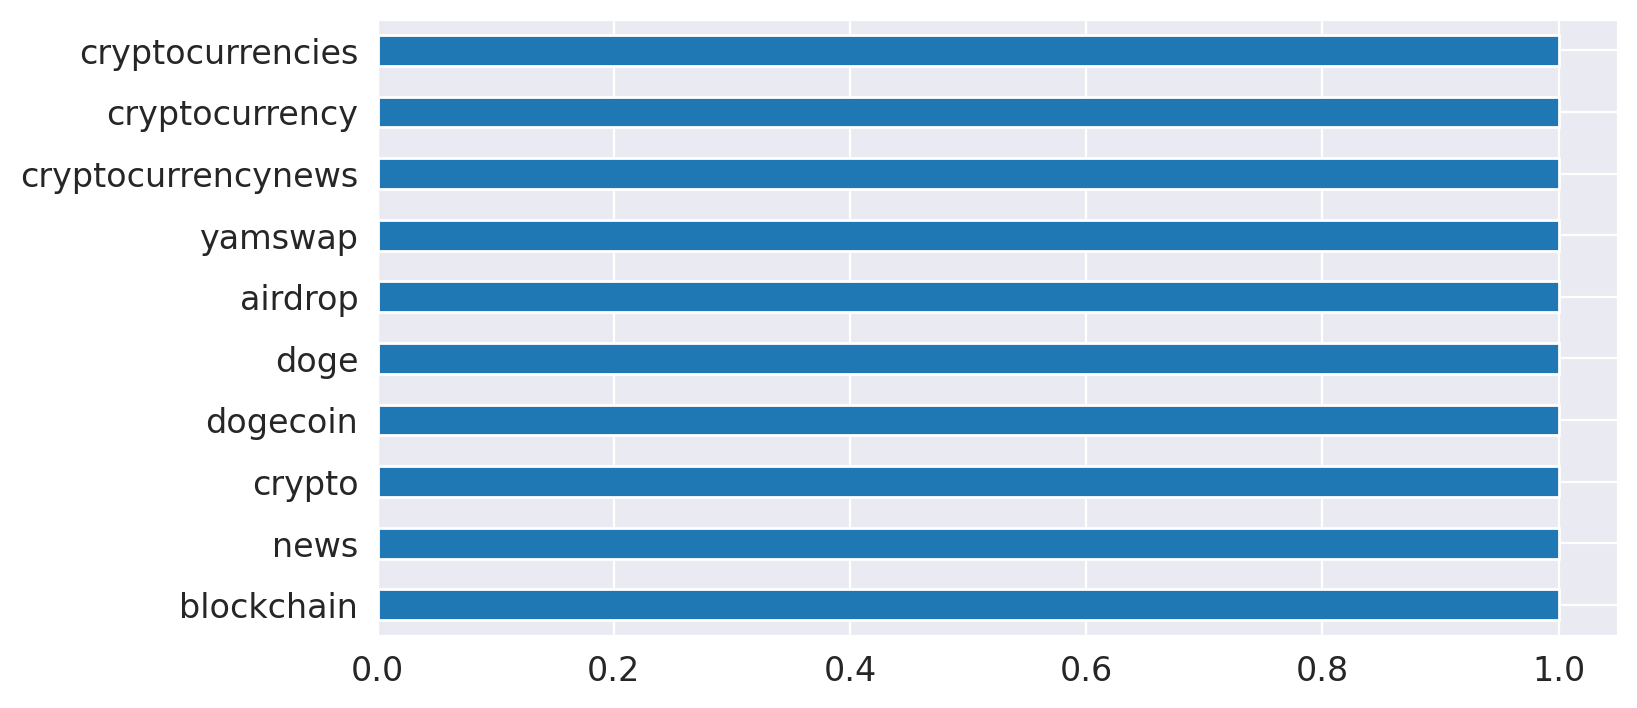

In [38]:
df['Entities'] = df['entities.hashtags'].apply(extract_entities)
pd.Series(np.concatenate(df['Entities'])).value_counts()[:25].plot(kind='barh')

In [39]:
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# tweets = tweepy.Cursor(api.user_timeline,
#                        screen_name='MercedesAMGF1',
#                        lang="en",
#                        tweet_mode='extended',
#                        count=100).items(5000)

# retrieved_tweets = [tweet._json for tweet in tweets]
# df = pd.io.json.json_normalize(retrieved_tweets)
# print ('Number of retrieved tweets ', len(df))

NameError: name 'tweepy' is not defined

In [ ]:
# def get_user_timeline(screen_name):
#     api = tweepy.API(auth,
#                      wait_on_rate_limit=True,
#                      wait_on_rate_limit_notify=True)
#     tweets = tweepy.Cursor(api.user_timeline,
#                            screen_name=screen_name,
#                            lang="en",
#                            tweet_mode='extended',
#                            count=200).items()
#     retrieved_tweets = [tweet._json for tweet in tweets]
#     df = pd.io.json.json_normalize(retrieved_tweets)
#     df = df[~df['retweeted_status.id'].isna()]
#     return df

In [ ]:
# df_mercedes = get_user_timeline('MercedesAMGF1')
# print ('Number of Tweets from Mercedes', len(df_mercedes))
# df_ferrari = get_user_timeline('ScuderiaFerrari')
# print ('Number of Tweets from Ferrari', len(df_ferrari))

Number of Tweets from Mercedes 203
Number of Tweets from Ferrari 168


In [40]:
import regex as re
import nltk
from collections import Counter
from wordcloud import WordCloud

stopwords = set(nltk.corpus.stopwords.words('english'))
RE_LETTER = re.compile(r'\b\p{L}{2,}\b')

def tokenize(text):
    return RE_LETTER.findall(text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [41]:
def wordcloud_blueprint(df, colName, max_words, num_stopwords):
    # Step 1: Convert input text column into tokens
    df['tokens'] = df[colName].map(prepare)

    # Step 2: Determine the frequency of each of the tokens
    freq_df = count_words(df)

    # Step 3: Generate the wordcloud using the frequencies controlling for stopwords
    wordcloud(freq_df['freq'], max_words, stopwords=freq_df.head(num_stopwords).index)

<Figure size 2400x800 with 0 Axes>

<Axes: >

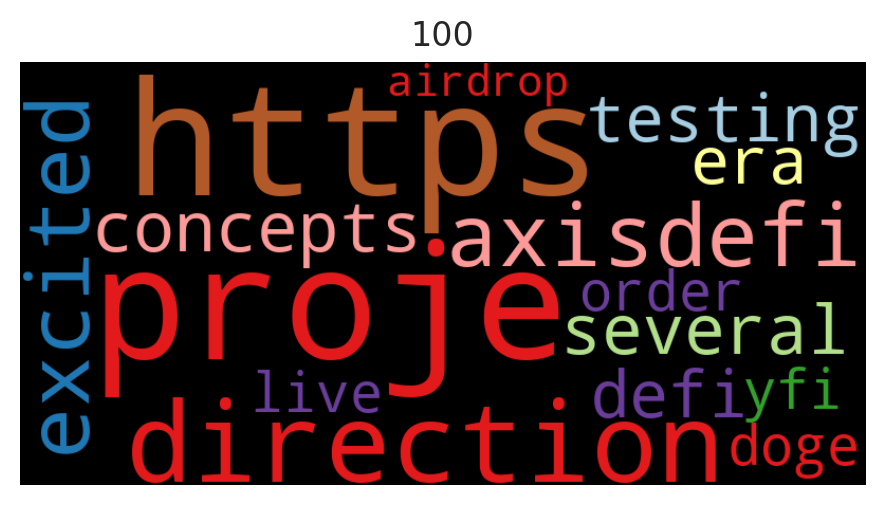

In [44]:
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)  ###
# wordcloud_blueprint(df_mercedes, 'full_text',
#           max_words=100,
#           num_stopwords=5)

# plt.subplot(1, 2, 2)  ###
# wordcloud_blueprint(df_ferrari, 'full_text',
#           max_words=100,
#           num_stopwords=5)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  ###
wordcloud_blueprint(df, 'text',
          max_words=100,
          num_stopwords=5)

In [ ]:
from datetime import datetime
import math

class FileStreamListener(tweepy.StreamListener):

    def __init__(self, max_tweets=math.inf):
        self.num_tweets = 0
        self.TWEETS_FILE_SIZE = 10
        self.num_files = 0
        self.tweets = []
        self.max_tweets = max_tweets

    def on_data(self, data):
        while (self.num_files * self.TWEETS_FILE_SIZE < self.max_tweets):
            self.tweets.append(json.loads(data))
            self.num_tweets += 1
            if (self.num_tweets < self.TWEETS_FILE_SIZE):
                return True
            else:
                filename = 'Tweets_' + str(datetime.now().time().strftime("%H%M%S%f")) + '.txt'
                print (self.TWEETS_FILE_SIZE, 'Tweets saved to', filename)
                file = open(filename, "w")
                json.dump(self.tweets, file)
                file.close()
                self.num_files += 1
                self.tweets = []
                self.num_tweets = 0
                return True
        return False

    def on_error(self, status_code):
        if status_code == 420:
            print ('Too many requests were made, please stagger requests')
            return False
        else:
            print ('Error {}'.format(status_code))
            return False

In [ ]:
user_access_token = 'YOUR_USER_ACCESS_TOKEN_HERE'
user_access_secret = 'YOUR_USER_ACCESS_SECRET_HERE'

auth = tweepy.OAuthHandler(app_api_key, app_api_secret_key)
auth.set_access_token(user_access_token, user_access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
fileStreamListener = FileStreamListener(20)
fileStream = tweepy.Stream(auth=api.auth,
                           listener=fileStreamListener,
                           tweet_mode='extended')
fileStream.filter(track=['cryptocurrency'])

10 Tweets saved to Tweets_104210491845.txt
10 Tweets saved to Tweets_104212062715.txt


In [45]:
df = pd.json_normalize(json.load(open('Tweets_104210491845.txt')))
df.head(2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,...,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.possibly_sensitive,retweeted_status.filter_level,retweeted_status.lang,display_text_range,possibly_sensitive,quoted_status.entities.media,quoted_status.extended_entities.media,extended_tweet.full_text,extended_tweet.display_text_range,extended_tweet.entities.hashtags,extended_tweet.entities.urls,extended_tweet.entities.user_mentions,extended_tweet.entities.symbols
0,Mon May 10 08:42:03 +0000 2021,1391674884531523591,1391674884531523591,@Acousticmoron @Acousticmemer @htrtomoon,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,1251401938760949760.00,1251401938760949760,Acousticmoron,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon May 10 08:42:03 +0000 2021,1391674885915627526,1391674885915627526,"RT @AXISDeFi: AXIS DeFi — A New Era\n\nAxis has been testing several concepts, and we are beyond excited about the new direction of the proje…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,None,None,None,None,None,...,False,False,False,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI,
        user_agent='my_bot_demo'
)

p_wiki = wiki_wiki.page('Cryptocurrency')
print (p_wiki.text[:200], '....')

A cryptocurrency, crypto-currency, or crypto is a digital currency designed to work through a computer network that is not reliant on any central authority, such as a government or bank, to uphold or  ....


# Closing Remarks